In [3]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dropout,Flatten,Dense,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [19]:
root_path ='/kaggle/input/shai-level-2-training-2023'
train_path = root_path+'/train'
test_path = root_path+'/test'

In [21]:
os.listdir(root_path)

['sample_submission.csv', 'train.csv', 'test', 'train']

In [22]:
train_covid = len(os.listdir(train_path+'/covid'))
train_normal = len(os.listdir(train_path+'/normal'))
train_virus = len(os.listdir(train_path+'/virus'))
print("Total number of images in train set", (train_normal+train_virus+train_covid))

Total number of images in train set 1196


In [23]:
test = len(os.listdir(test_path))
print("Total number of images in test set", (test))

Total number of images in test set 513


In [24]:
os.listdir(train_path)

['normal', 'covid', 'virus']

In [29]:
train_paths = []
train_labels = []

In [30]:
for label in os.listdir(train_path):
    for image in os.listdir(train_path+'/'+label):
        train_paths.append(train_path+'/'+label+'/'+image)
        train_labels.append(label)

In [36]:
test_paths = []
test_labels = []

for label in os.listdir(test_path):
    for image in os.listdir(test_path):
        test_paths.append(test_path+label+'/'+image)
        test_labels.append(label)

In [37]:
def plot_image(path, title):
    image_filenames = os.listdir(path)
    fig, axs = plt.subplots(1, 4, figsize=(20,10))
    for i in range(4):
        image_data = plt.imread(path + '/' + image_filenames[i])
        print(image_data.shape)
        axs[i].imshow(image_data, cmap="gray")
        axs[i].set_title(title)
    plt.show()

(1754, 1928)
(1171, 1314)
(2237, 2260)
(1916, 1886)


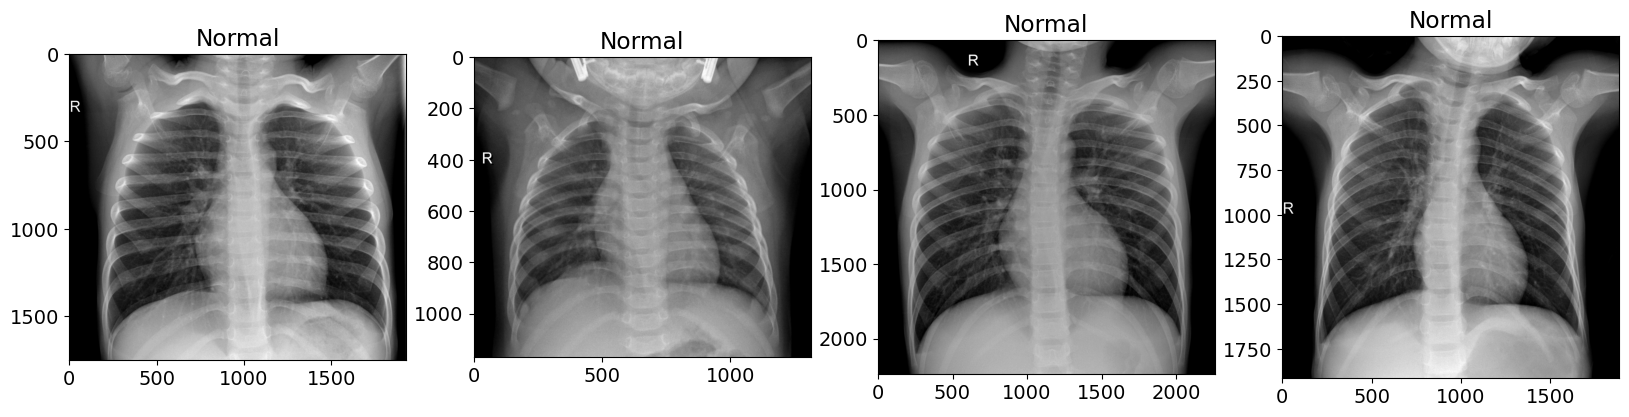

In [38]:
image_folder_path = train_path + '/normal'
plot_image(image_folder_path, "Normal")

(480, 640, 3)
(480, 640, 3)
(247, 256, 4)
(842, 1024, 3)


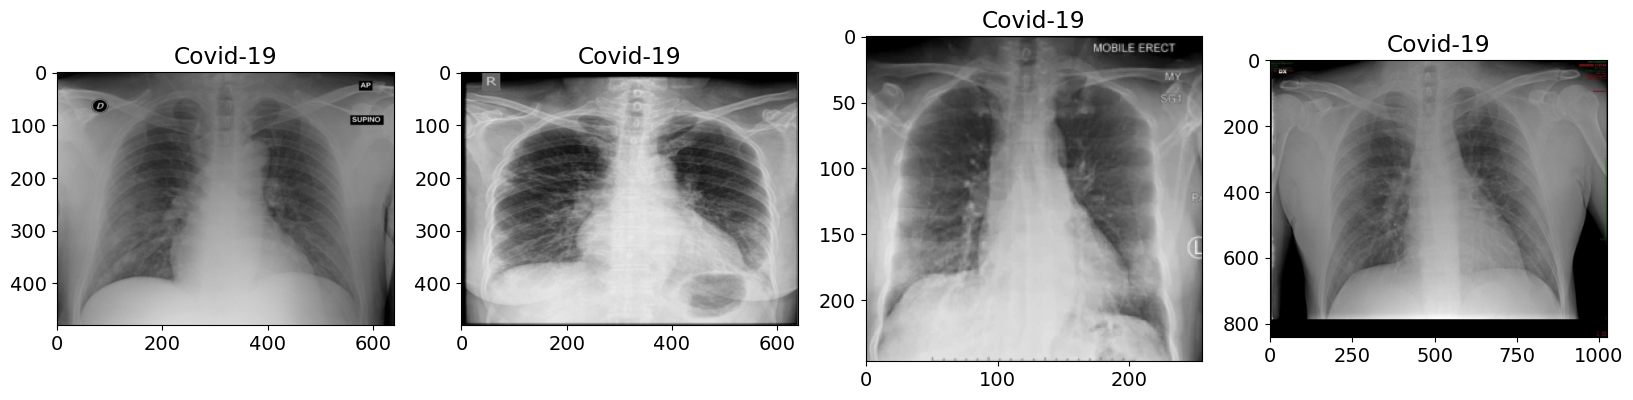

In [39]:
image_folder_path = train_path + '/covid'
plot_image(image_folder_path, "Covid-19")

(1192, 1536)
(832, 1284)
(800, 1312)
(709, 1236)


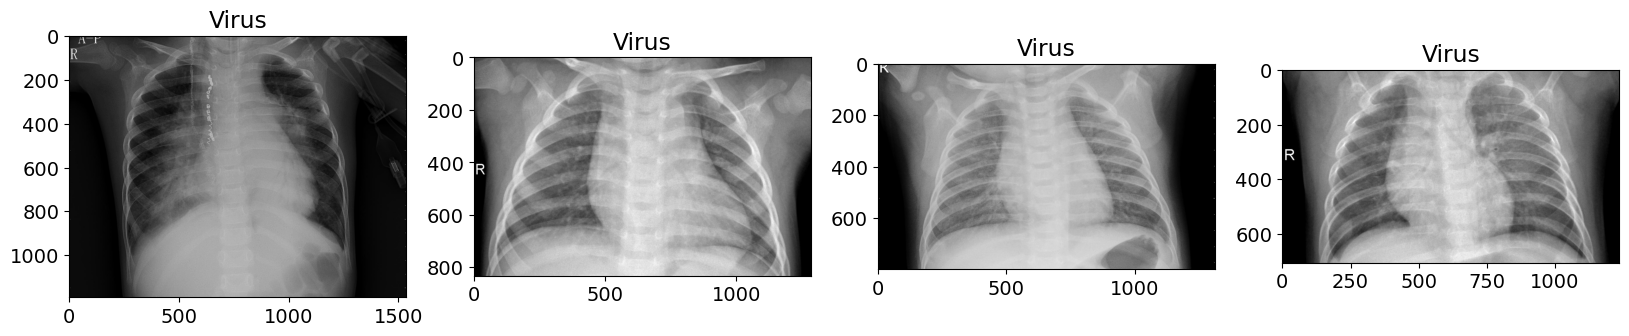

In [40]:
image_folder_path = train_path + '/virus'
plot_image(image_folder_path, "Virus")